In [40]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [41]:
img = cv.imread("input.jpg", cv.IMREAD_GRAYSCALE)

In [42]:
# convert to np array
img = np.array(img)

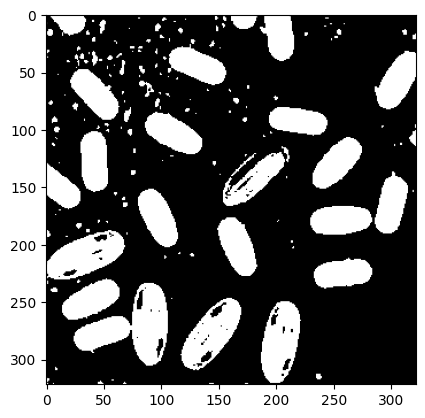

In [43]:
ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(thresh, 'gray')

In [44]:
cnts = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2]

In [45]:
scnts = []

for cnt in cnts:
    scnts.append(cv.contourArea(cnt))   

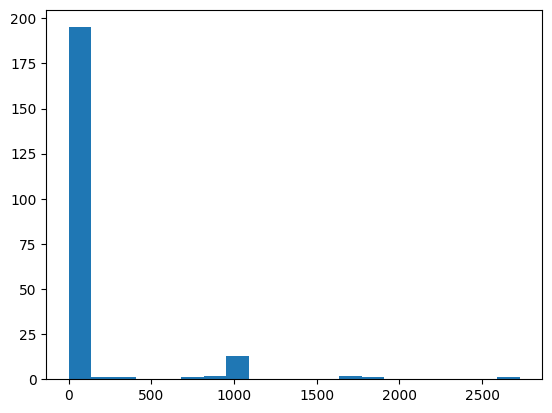

In [46]:
# draw histogram of contours
plt.hist(scnts, bins = 20)
plt.show()

In [47]:
min_area = 0
max_area = 300

def filter_contours(cnts, min_area, max_area):
    contours = []
    for cnt in cnts:
        if min_area < cv.contourArea(cnt) < max_area:
            contours.append(cnt)
    return contours
  
new_cnts = filter_contours(cnts, min_area, max_area)

In [48]:
# Create a black image with the same dimensions as the original
black_img = np.zeros_like(thresh)

# Draw contours on the black image
cv.drawContours(black_img, new_cnts, -1, (255, 255, 255), thickness=cv.FILLED)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)

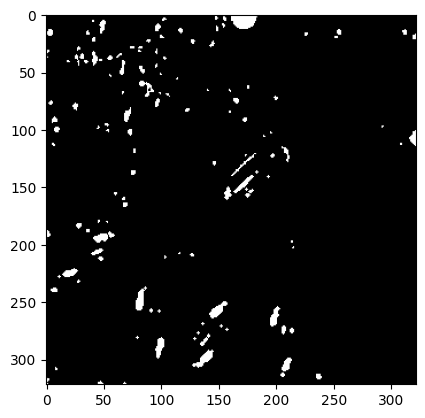

In [49]:
plt.imshow(black_img, 'gray')

In [50]:
result = black_img + thresh

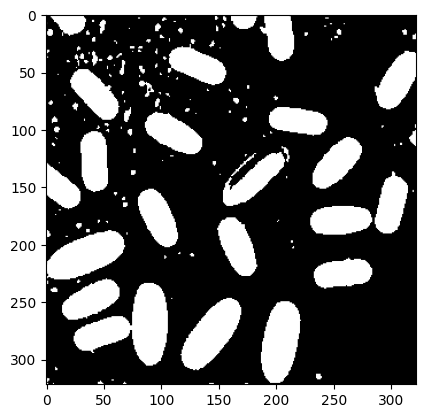

In [51]:
plt.imshow(result, 'gray')

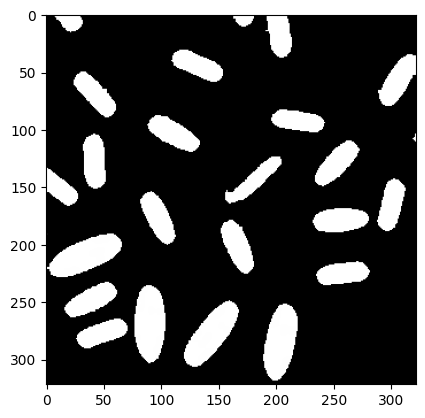

In [52]:
# perform erosion
kernel = np.ones((5, 5), np.uint8)
final_output = cv.erode(result, kernel, iterations=1)

plt.imshow(final_output, 'gray')

In [53]:
# save the result
cv.imwrite("output.jpg", final_output)

True